In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#2): Which is digit '4'


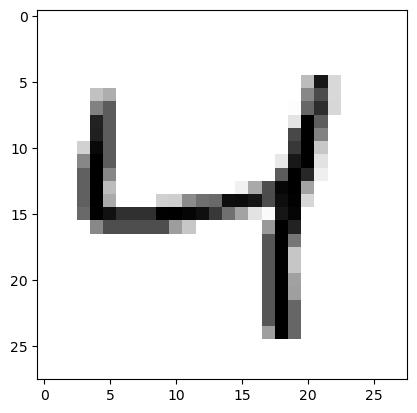

In [18]:
digit = 2 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

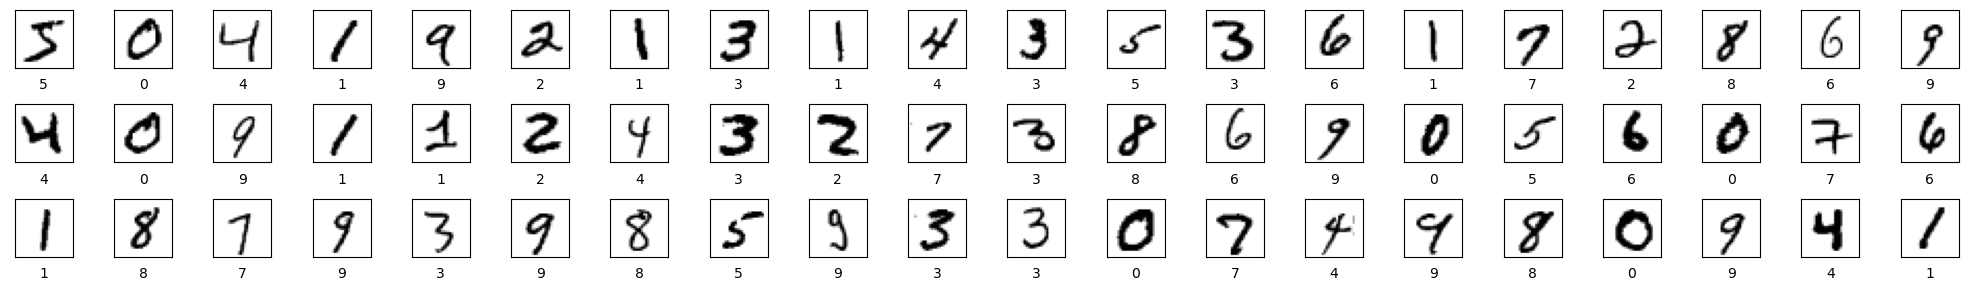

In [19]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [20]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#20): Which is digit '4'


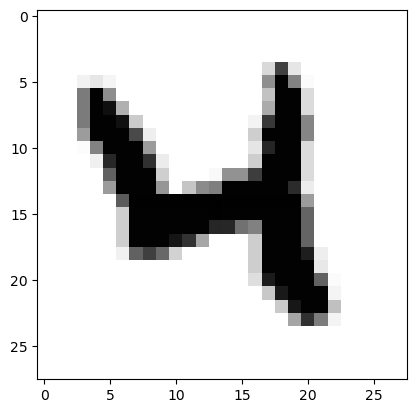

In [21]:
digit = 20 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [22]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [24]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 2s 3ms/step - loss: 0.2636 - accuracy: 0.9210 - val_loss: 0.1413 - val_accuracy: 0.9589
Epoch 2/5
657/657 [==============================] - 2s 3ms/step - loss: 0.1023 - accuracy: 0.9685 - val_loss: 0.1072 - val_accuracy: 0.9675
Epoch 3/5
657/657 [==============================] - 2s 3ms/step - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0998 - val_accuracy: 0.9708
Epoch 4/5
657/657 [==============================] - 2s 2ms/step - loss: 0.0472 - accuracy: 0.9843 - val_loss: 0.1098 - val_accuracy: 0.9679
Epoch 5/5
657/657 [==============================] - 2s 3ms/step - loss: 0.0353 - accuracy: 0.9880 - val_loss: 0.0953 - val_accuracy: 0.9737


In [25]:
k=h

In [26]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [27]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 2s 2ms/step - loss: 0.0157 - accuracy: 0.9958 - val_loss: 0.0811 - val_accuracy: 0.9768
Epoch 2/5
657/657 [==============================] - 1s 2ms/step - loss: 0.0123 - accuracy: 0.9972 - val_loss: 0.0798 - val_accuracy: 0.9780
Epoch 3/5
657/657 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.0798 - val_accuracy: 0.9778
Epoch 4/5
657/657 [==============================] - 1s 2ms/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: 0.0798 - val_accuracy: 0.9779
Epoch 5/5
657/657 [==============================] - 1s 2ms/step - loss: 0.0095 - accuracy: 0.9981 - val_loss: 0.0796 - val_accuracy: 0.9779


In [28]:
k1=h

In [29]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [30]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 2s 2ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0986 - val_accuracy: 0.9758
Epoch 2/5
657/657 [==============================] - 2s 2ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.1171 - val_accuracy: 0.9749
Epoch 3/5
657/657 [==============================] - 2s 2ms/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.1312 - val_accuracy: 0.9727
Epoch 4/5
657/657 [==============================] - 2s 2ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.1293 - val_accuracy: 0.9753
Epoch 5/5
657/657 [==============================] - 2s 2ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.1279 - val_accuracy: 0.9769


In [31]:
k2=h

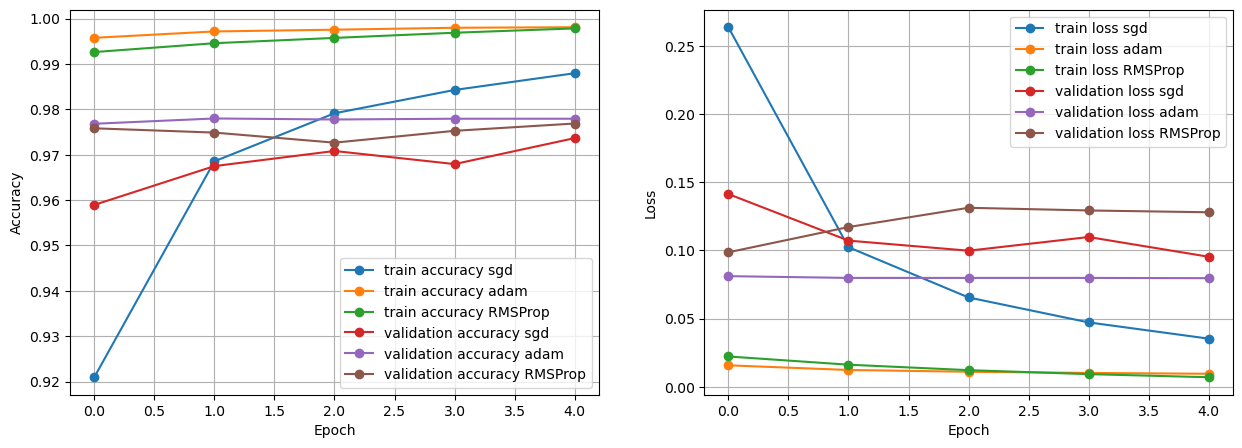

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k.history['accuracy'], 'o-', label='train accuracy sgd')
plt.plot(k1.history['accuracy'], 'o-', label='train accuracy adam')
plt.plot(k2.history['accuracy'], 'o-', label='train accuracy RMSProp')
plt.plot(k.history['val_accuracy'], 'o-', label = 'validation accuracy sgd')
plt.plot(k1.history['val_accuracy'], 'o-', label = 'validation accuracy adam')
plt.plot(k2.history['val_accuracy'], 'o-', label = 'validation accuracy RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(k.history['loss'], 'o-', label='train loss sgd')
plt.plot(k1.history['loss'], 'o-', label='train loss adam')
plt.plot(k2.history['loss'], 'o-', label='train loss RMSProp')
plt.plot(k.history['val_loss'], 'o-', label='validation loss sgd')
plt.plot(k1.history['val_loss'], 'o-', label='validation loss adam')
plt.plot(k2.history['val_loss'], 'o-', label='validation loss RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')


In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.9800

Test accuracy: 0.9800000190734863


In [34]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 883us/step


4/4 [==============================] - 0s 1ms/step


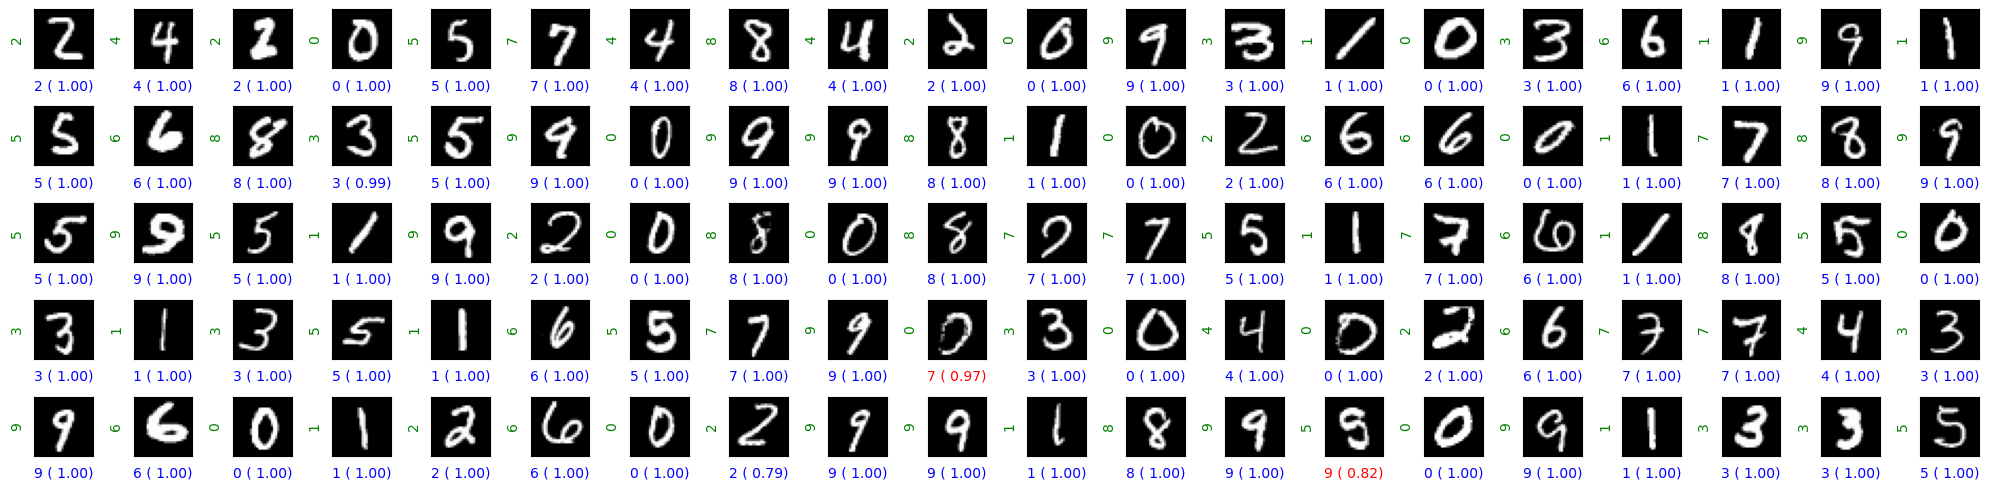

In [35]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()